<a href='http://www.scienceacademy.ca'> <img style="float: left;height:70px" src="Log_SA.jpeg"></a>

# Project on Oil vs Banks during resession - Overview
## Exploratory Data Analysis of Stock Prices

Hi Guys,<br>

Welcome to the capstone project of data analysis and data visualization using Python. <br>
Its great to see you making progress to the point where you can apply your knowledge to analyze the real date. The datasets are generated using **[`pandas-datareader`](http://pandas-datareader.readthedocs.io/en/latest/#)** which allows to read the stock information directly from the internet. In this project, we will focus on exploratory data analysis of stock prices. Although, you can read the stock price data directly from API, however, for your convenience the csv files for each company are provided in the course material for you to use.<br>

&#9758; Please note, this project is only for practice of data visualization and analysis skills. It does not provide detailed financial analysis and no advice can be taken from this analysis. 

&#9989; You may find this project challenging as this will bring lot of new concepts. These concepts are helpful for you to evaluate and critically analyze the data and its different aspects. However, learning takes time and needs lot's of practice, you must practice your skills while exploring options to present your findings in most effective ways. 

**Domain Knowledge** <br>
Domain knowledge plays important role while analyzing data and presenting solid conclusions. Whenever, you get data to analyze, try your best to get as much as possible information about the circumstances. This is simple science, to present solid conclusions, domain knowledge plays important role.<br>

We all know that the [World's oil market is crazy](https://en.wikipedia.org/wiki/World_oil_market_chronology_from_2003). It has significant effects on the global economy. Several incident between 2007 and 2009 including oil price change from ~ 147 to ~ 32`$` a barrel, and [global financial crises](https://en.wikipedia.org/wiki/Financial_crisis_of_2007–2008) effected world economy and [GDP in 2009](https://en.wikipedia.org/wiki/Financial_crisis_of_2007–2008#/media/File:GDP_Real_Growth.svg). A chain of these incidents caused several leading countries into recession. Let's explore, how the stock price varies from 2006 to 2017 for some of the oil companies and banks in Canada. <br>

In this project, we will also explore the ups and downs in the stock price of The United States Oil Fund (USO) and West Texas Intermediate Light Sweet Crude Oil. The United States Oil Fund is an exchange-traded fund that attempts to track the price of West Texas Intermediate Light Sweet Crude Oil (WTI). WTI is a grade of crude oil used as a benchmark in oil pricing.

&#9758; Recall you knowledge on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html), we will use this in the projcet. 

**Let's import some important libraries first**

In [1]:
import warnings
warnings.simplefilter("ignore")

# Essential imports for data analysis for visualization 
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

#import if you want to read the data directly form the API using pandas_datareader
#import pandas_datareader.data as web

# Imports for offline interactive plotting
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 
import cufflinks as cf
cf.go_offline()

# Setting style and inline plotting
sns.set_style('whitegrid')
%matplotlib inline

** Let's read the datasets individually from provided csv files.**

In [2]:
rbc = pd.read_csv('RBC.csv',index_col='Date') # Royal Bank of Canada
cibc = pd.read_csv('CIBC.csv',index_col='Date') # Canadian Imperial Bank of Commerce
bmo = pd.read_csv('BMO.csv',index_col='Date') # Bank of Montreal 
suncor = pd.read_csv('Suncor.csv',index_col='Date') # Suncor Energy Inc.
encana = pd.read_csv('Encana.csv',index_col='Date' ) # Encana Corp.
cnq = pd.read_csv('CNQ.csv',index_col='Date' ) # Canadian Natural Resource Ltd.
uso = pd.read_csv('USO.csv',index_col='Date') # United States Oil Fund LP (ETF)
wti = pd.read_csv('WTI.csv',index_col='Date') # WTI Oil price

**Check the head and tail of any dataframe, e.g. cnq.**

In [3]:
rbc.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,38.90,39.75,38.83,39.59,346000
2006-01-04,39.74,40.36,39.69,40.34,382200
2006-01-05,39.90,39.90,39.40,39.48,261200
2006-01-06,39.50,39.59,39.24,39.28,189600
2006-01-09,39.02,39.32,38.70,39.00,197200


In [4]:
rbc.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-23,67.92,67.97,67.68,67.77,423297
2016-12-27,67.97,67.98,67.85,67.90,267936
2016-12-28,67.69,67.95,67.46,67.71,471898
2016-12-29,67.78,68.05,67.33,67.68,618889
2016-12-30,68.16,68.29,67.60,67.71,717457


** Combine banks (RBC, CIBC, BMO) and oil companies (Suncor, Encana, CNQ) datasets into a single dataset 'bo' ('b' for bank and 'o' for oil) and check the head of the dataset**<br>

Hint: Use <br>`tickers = ['RBC', 'CIBC', 'BMO', 'Suncor', 'Encana','CNQ']` <br>to add a hierarchical index at the outermost level of the data with the `keys` option in `pd.concat()`.

In [5]:
tickers = ['RBC', 'CIBC', 'BMO', 'Suncor', 'Encana','CNQ']
bo= pd.concat([rbc , cibc , bmo , suncor , encana , cnq],axis=1,keys=tickers)
bo.head()

RBC                                CIBC                       \
             Open   High    Low  Close  Volume   Open   High    Low  Close   
Date                                                                         
2006-01-03  38.90  39.75  38.83  39.59  346000  65.61  67.25  65.61  66.98   
2006-01-04  39.74  40.36  39.69  40.34  382200  67.39  67.94  67.20  67.94   
2006-01-05  39.90  39.90  39.40  39.48  261200  67.39  67.75  67.24  67.47   
2006-01-06  39.50  39.59  39.24  39.28  189600  67.57  67.80  67.34  67.74   
2006-01-09  39.02  39.32  38.70  39.00  197200  67.07  67.88  66.98  67.63   

                   ... Encana                                  CNQ         \
           Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date               ...                                                      
2006-01-03  49400  ...  45.40  46.86  45.37  46.70  3852900  24.81  25.62   
2006-01-04  30000  ...  46.10  46.39  45.49  46.30  3926300  25.44  26.49   
2006-01-05  61200  ...  45.75  45.88  44.77  45.22  3941700  26.18  26.22   
2006-01-06  36300  ...  45.83  46.18  45.50  45.86  2786900  26.00  26.26   
2006-01-09  37900  ...  45.95  45.99  45.01  45.05  2878100  26.00  26.34   

                                   
              Low  Close   Volume  
Date                               
2006-01-03  24.81  25.48  2674000  
2006-01-04  25.20  26.44  2312200  
2006-01-05  25.58  25.72  1878600  
2006-01-06  25.80  26.00  1391600  
2006-01-09  25.77  26.16  1510800  

[5 rows x 30 columns]

**Get the list of column headers or column name in 'bo'.**

In [6]:
bo.columns.names

FrozenList([None, None])

**Give the column names, say '`Entity`' and '`Stock`'**

In [7]:
bo.columns.names = ['Entity', 'Stock']
bo.columns.names

FrozenList(['Entity', 'Stock'])

**Re-check the head of 'bo'**

In [8]:
# Code here please
bo.head()

Entity        RBC                                CIBC                       \
Stock        Open   High    Low  Close  Volume   Open   High    Low  Close   
Date                                                                         
2006-01-03  38.90  39.75  38.83  39.59  346000  65.61  67.25  65.61  66.98   
2006-01-04  39.74  40.36  39.69  40.34  382200  67.39  67.94  67.20  67.94   
2006-01-05  39.90  39.90  39.40  39.48  261200  67.39  67.75  67.24  67.47   
2006-01-06  39.50  39.59  39.24  39.28  189600  67.57  67.80  67.34  67.74   
2006-01-09  39.02  39.32  38.70  39.00  197200  67.07  67.88  66.98  67.63   

Entity             ... Encana                                  CNQ         \
Stock      Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date               ...                                                      
2006-01-03  49400  ...  45.40  46.86  45.37  46.70  3852900  24.81  25.62   
2006-01-04  30000  ...  46.10  46.39  45.49  46.30  3926300  25.44  26.49   
2006-01-05  61200  ...  45.75  45.88  44.77  45.22  3941700  26.18  26.22   
2006-01-06  36300  ...  45.83  46.18  45.50  45.86  2786900  26.00  26.26   
2006-01-09  37900  ...  45.95  45.99  45.01  45.05  2878100  26.00  26.34   

Entity                             
Stock         Low  Close   Volume  
Date                               
2006-01-03  24.81  25.48  2674000  
2006-01-04  25.20  26.44  2312200  
2006-01-05  25.58  25.72  1878600  
2006-01-06  25.80  26.00  1391600  
2006-01-09  25.77  26.16  1510800  

[5 rows x 30 columns]

** What is the `max` and `min` Close price for each bank's stock throughout the time period?**

In [9]:
Max_Stock_Price=bo.xs(key='Close',axis=1,level='Stock').max()
Max_Stock_Price

Entity
RBC        75.90
CIBC      108.24
BMO        78.03
Suncor     72.95
Encana     96.89
CNQ        53.70
dtype: float64

In [10]:
Min_Stock_Price=bo.xs(key='Close',axis=1,level='Stock').min()
Min_Stock_Price

Entity
RBC       20.62
CIBC      28.39
BMO       19.51
Suncor    14.66
Encana     3.01
CNQ       13.49
dtype: float64

**Recreate the bar plots below for max and min stock price, who got the biggest hit!** Hint: Use `subplots()` and pass `ncols = 2`.

(0.0, 120.0)

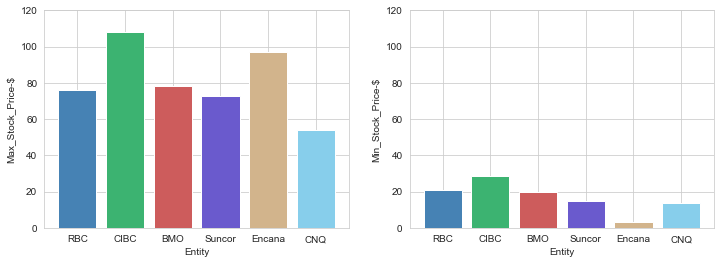

In [11]:
fig, axes = plt.subplots(1,2,figsize=(12, 4))

axes[0].bar(tickers, Max_Stock_Price,color=['steelblue','mediumseagreen','indianred','slateblue','tan','skyblue'])
axes[0].grid(True)
axes[0].set(xlabel='Entity', ylabel='Max_Stock_Price-$')
axes[0].set_ylim([0, 120])

axes[1].bar(tickers,Min_Stock_Price )
axes[1].grid(True)
axes[1].set(xlabel='Entity', ylabel='Min_Stock_Price-$')
axes[1].bar(tickers, Min_Stock_Price,color=['steelblue','mediumseagreen','indianred','slateblue','tan','skyblue'])
axes[1].set_ylim([0, 120])

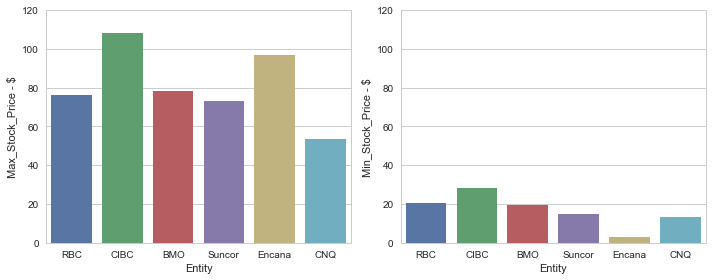

In [ ]:
Max_Stock_Price

** Line plot can give the idea on how the stock value changes with time, plot 'Close' value of each stock in your data against time.<br> 
Recreate the plot below using `for` loop.** Hint: for the look, you have `tickers = ['RBC', 'CIBC', 'BMO', 'Suncor', 'Encana','CNQ']`. Grab the column '`Close`' 

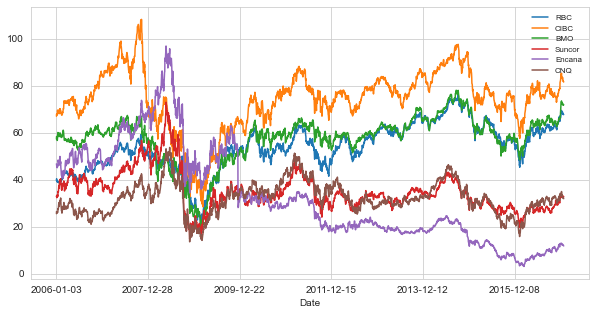

In [12]:
for tick in tickers:
    bo[tick]['Close'].plot(figsize=(10,5),label=tick)
plt.legend(loc ="upper right",framealpha=0, prop={'size': 8})

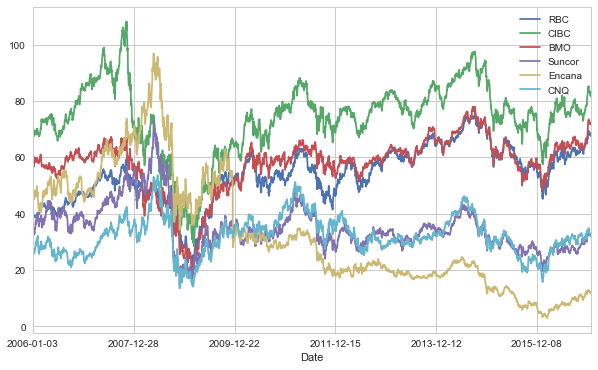

**The above plot is good, however, the visualization can be improved with interactive data plotting. You can select the entity you want to display on the plot.**<br>
**Use cross section [`.xs()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) method to plot interactive plot for your data. **

In [13]:
bo.xs(key='Open',axis=1,level='Stock').iplot()
#bo.xs(key='Close',axis=1,level='Stock').iplot()
#bo.xs(key='Volume',axis=1,level='Stock').iplot()

**Check the head of wti**

In [33]:
wti.head()

,Value
Date,
2016-12-30,53.75
2016-12-29,53.80
2016-12-28,54.01
2016-12-27,52.82
2016-12-23,52.01


**Set wti column from 'value' to 'Oil Price / Barrel' and display the head of the dataframe**

In [34]:
wti.rename(columns = {'Value' : 'Oil Price / Barrel'}, inplace = True)
wti.head()

,Oil Price / Barrel
Date,
2016-12-30,53.75
2016-12-29,53.80
2016-12-28,54.01
2016-12-27,52.82
2016-12-23,52.01


,Oil Price / Barrel
Date,
2016-12-30,53.75
2016-12-29,53.80
2016-12-28,54.01
2016-12-27,52.82
2016-12-23,52.01


**All stock went down between 2008 and 2009, Check the oil price and US oil fund stock, how did they change?** Hint: `plt.subplots()`

In [35]:
wti=wti.sort_values(by='Date')
wti

,Oil Price / Barrel
Date,
2006-01-03,63.11
2006-01-04,63.41
2006-01-05,62.81
2006-01-06,64.21
2006-01-09,63.56
...,...
2016-12-23,52.01
2016-12-27,52.82
2016-12-28,54.01


In [36]:
uso.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-04-10,68.25,68.50,67.67,68.02,3877300
2006-04-11,68.32,68.39,67.30,68.20,1290900
2006-04-12,68.22,68.81,67.81,67.84,1243700
2006-04-13,67.50,68.99,67.40,68.82,557200
2006-04-17,69.20,69.90,68.68,69.79,903000


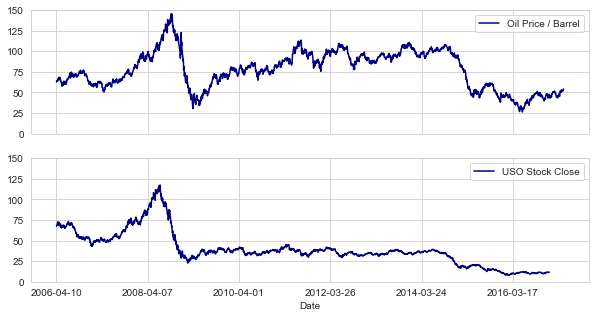

In [37]:
s1= wti['Oil Price / Barrel']
s2= uso['Close']

fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(10,5),sharex=True)

f1= s1.plot(ax=axes[0],label='Oil Price / Barrel',color='navy')
axes[0].set_ylim([0, 150])
axes[0].legend(loc='best')

f2= s2.plot(ax=axes[1],label='USO Stock Close',color='navy')
axes[1].set_ylim([0, 150])
axes[1].legend(loc='best')

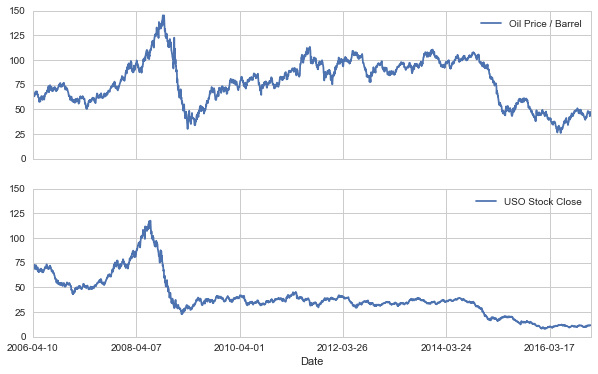

** Create a new empty DataFrame called profit.<br>
Calculate profit/return on investment for each entity in your dataframe and copy the values in newly created dataframe.<br>
[Returns or profits](https://en.wikipedia.org/wiki/Rate_of_return) are typically defined by:**

$$r = \frac{p_f - p_{i}}{p_{i}} $$

***Hint: Use pandas built-in `pct_change()` method on Close column with `for loop`. *** 

In [38]:
profit=pd.DataFrame()

In [57]:
#bo.head()
df=bo["RBC"]
Re=(df["Close"]-df["Open"])/df["Open"]
print("Return RBC {} ".format(Re))

Return RBC Date
2006-01-03    0.017738
2006-01-04    0.015098
2006-01-05   -0.010526
2006-01-06   -0.005570
2006-01-09   -0.000513
                ...   
2016-12-23   -0.002208
2016-12-27   -0.001030
2016-12-28    0.000295
2016-12-29   -0.001475
2016-12-30   -0.006602
Length: 2769, dtype: float64 


pandas.core.frame.DataFrame

In [40]:
for bank in tickers:
    profit[bank + ' Return'] = bo[bank]['Close'].pct_change()

In [41]:
profit.head()

,RBC Return,CIBC Return,BMO Return,Suncor Return,Encana Return,CNQ Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.018944,0.014333,0.019389,0.010073,-0.008565,0.037677
2006-01-05,-0.021319,-0.006918,-0.014736,-0.023874,-0.023326,-0.027231
2006-01-06,-0.005066,0.004002,-0.005913,0.031269,0.014153,0.010886
2006-01-09,-0.007128,-0.001624,-0.008572,-0.012309,-0.017662,0.006154


,RBC Return,CIBC Return,BMO Return,Suncor Return,Encana Return,CNQ Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.018944,0.014333,0.019389,0.010073,-0.008565,0.037677
2006-01-05,-0.021319,-0.006918,-0.014736,-0.023874,-0.023326,-0.027231
2006-01-06,-0.005066,0.004002,-0.005913,0.031269,0.014153,0.010886
2006-01-09,-0.007128,-0.001624,-0.008572,-0.012309,-0.017662,0.006154


**First row is 'NaN' can you explain why?**

**Plotting all data give a good overview.<br>
Create a pairplot using seaborn of your returns dataframe.**

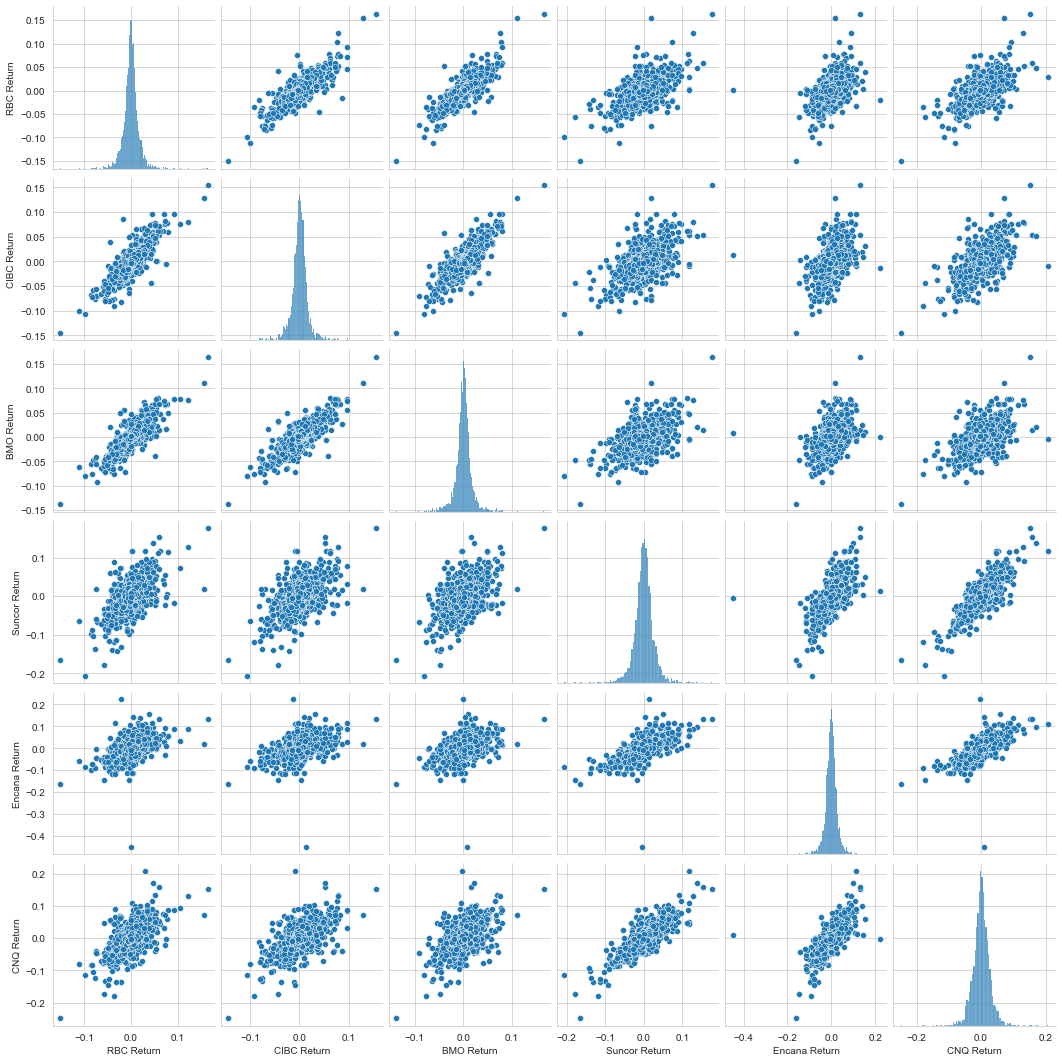

In [93]:
sns.pairplot(profit[1:]) 
plt.show()

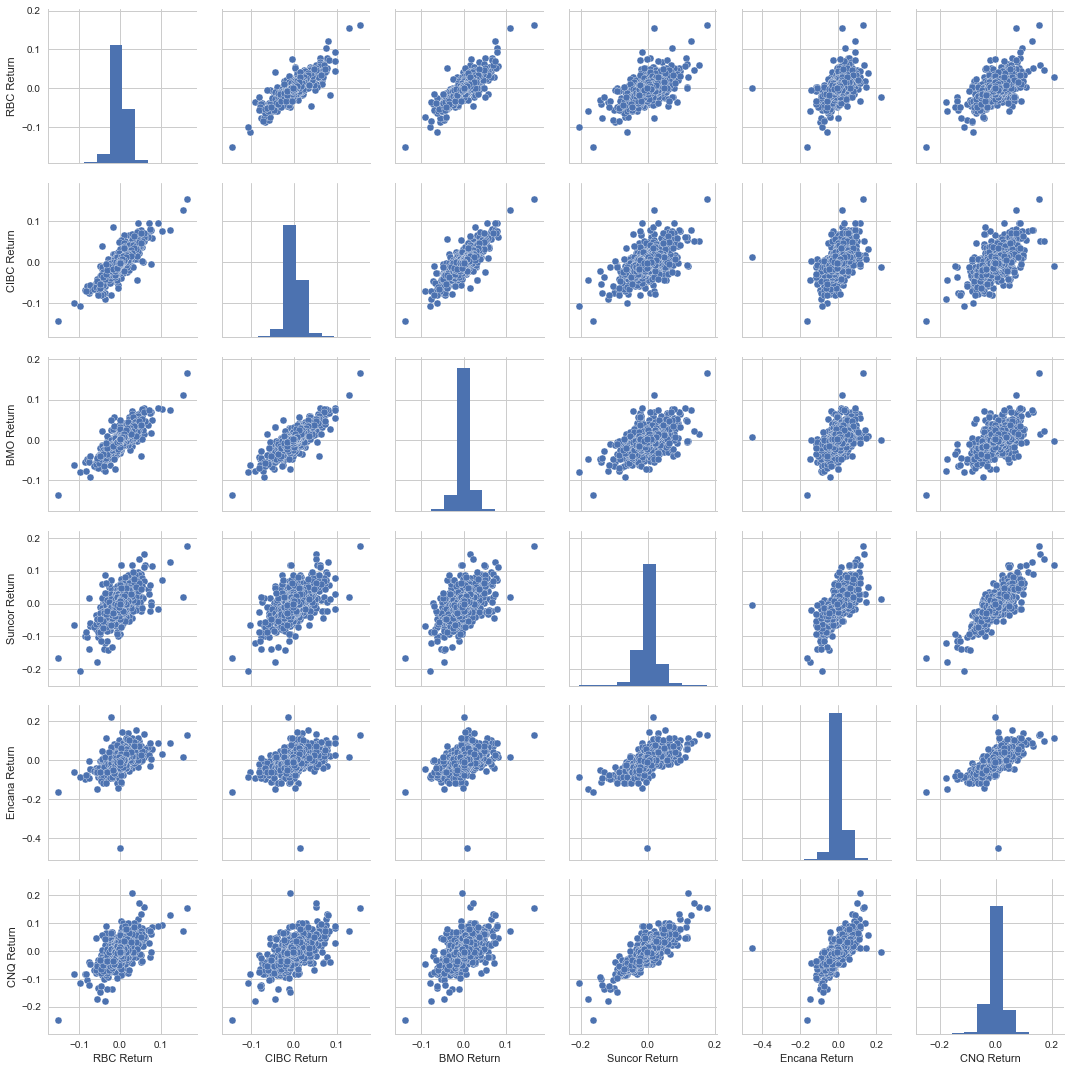

**What is the <br>**
* best single day gain and 
* the worst single day drop<br>

**for each company/bank**<br>

Hint:<br>
[`idxmax()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html) -- Return index of first occurrence of maximum over requested axis. NA/null values are excluded.<br>
[`idxmin()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmin.html) -- Return index of first occurrence of minimum over requested axis. NA/null values are excluded..<br>



In [42]:
profit.idxmax()

RBC Return       2008-10-13
CIBC Return      2008-10-13
BMO Return       2008-10-13
Suncor Return    2008-10-13
Encana Return    2016-02-24
CNQ Return       2008-11-21
dtype: object

RBC Return       2008-10-13
CIBC Return      2008-10-13
BMO Return       2008-10-13
Suncor Return    2008-10-13
Encana Return    2016-02-24
CNQ Return       2008-11-21
dtype: object

In [43]:
# Code here please
profit.idxmin()

RBC Return       2008-11-20
CIBC Return      2008-11-20
BMO Return       2008-11-20
Suncor Return    2009-01-20
Encana Return    2009-12-09
CNQ Return       2008-11-20
dtype: object

RBC Return       2008-11-20
CIBC Return      2008-11-20
BMO Return       2008-11-20
Suncor Return    2009-01-20
Encana Return    2009-12-09
CNQ Return       2008-11-20
dtype: object

** Which stock would you classify as the riskiest over the entire time period?** Hint: Look at the standard deviation of the returns.

In [44]:
# Code here please
profit.std()


RBC Return       0.017404
CIBC Return      0.018244
BMO Return       0.016974
Suncor Return    0.026503
Encana Return    0.029234
CNQ Return       0.028247
dtype: float64

RBC Return       0.017404
CIBC Return      0.018244
BMO Return       0.016974
Suncor Return    0.026503
Encana Return    0.029234
CNQ Return       0.028247
dtype: float64

**Which stock do you think was the riskiest for the year 2007 and how this changes for 2016? Let's take a look at the past and current time.**<br>
You can use [`.ix[]`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ix.html) or `loc[]` to get a slice of the data for the requested dates.<br>
`.ix` is the most general indexer and will support any of the inputs in .loc and .iloc. .ix also supports floating point label schemes. .ix is exceptionally useful when dealing with mixed positional and label based hierarchical indexes.

In [ ]:
# Code here please

RBC Return       0.031713
CIBC Return      0.036268
BMO Return       0.031502
Suncor Return    0.049237
Encana Return    0.040976
CNQ Return       0.054149
dtype: float64

In [ ]:
# Code here please

RBC Return       0.013636
CIBC Return      0.013055
BMO Return       0.012131
Suncor Return    0.020997
Encana Return    0.046978
CNQ Return       0.027645
dtype: float64

**Let's create few distplots using seaborn**<br>
**Create a distplot using seaborn of Encana and CNQ returns in 2008.**

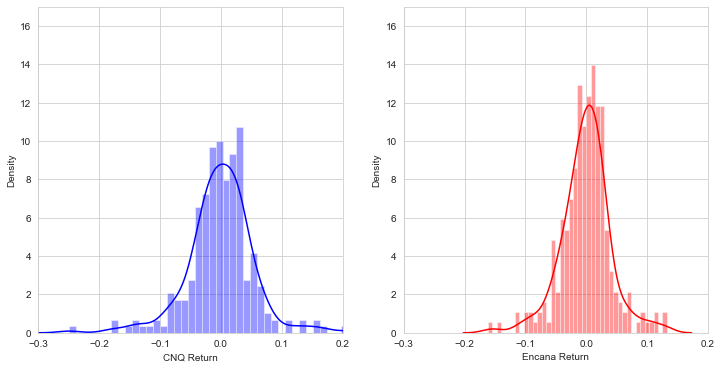

In [54]:
fig = plt.figure(figsize=(12,6))

#  subplot #1
plt.subplot(121)
sns.distplot(profit.loc['2008-01-01' : '2008-12-31']['CNQ Return'],bins = 40, color='blue')
plt.xlim([-0.3, 0.2])
plt.ylim([0, 17])
#  subplot #2
plt.subplot(122)
sns.distplot(profit.loc['2008-01-01' : '2008-12-31']['Encana Return'],bins = 40, color='red')
plt.xlim([-0.3, 0.2])
plt.ylim([0, 17])


plt.show()

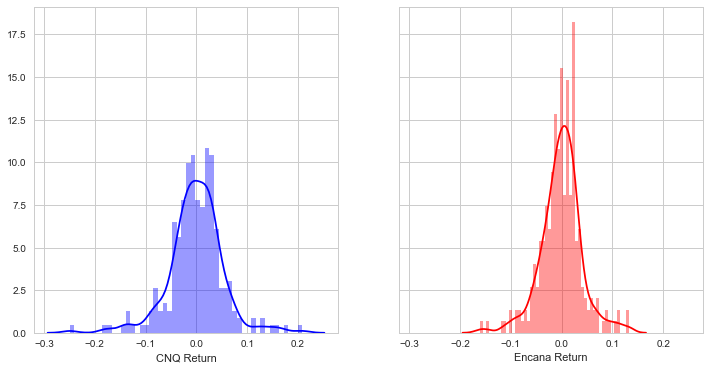

Let's analyze the **moving averages** for these stocks in the year 2008. <br>
** Plot the rolling 30 day average against the Close Price for Encana and CNQ stocks for the year 2008**<br>
Hint: [`pandas.DataFrame.rolling`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html) Provides rolling window calculations.

In [58]:
# Code here please
encana.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2006-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2768 non-null   float64
 1   High    2768 non-null   float64
 2   Low     2768 non-null   float64
 3   Close   2769 non-null   float64
 4   Volume  2769 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 194.3+ KB


<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2006-01-03 to 2016-12-30
Data columns (total 5 columns):
Open      2769 non-null float64
High      2769 non-null float64
Low       2769 non-null float64
Close     2769 non-null float64
Volume    2769 non-null int64
dtypes: float64(4), int64(1)
memory usage: 129.8+ KB


In [ ]:
# Code here please
plt.figure(figsize=(12,4))
bo['encana']['Close'].loc['2008-01-01' : '2009-01-01'].rolling(window = 30).mean().plot(label = "30 Day Avg")
bo['encana']['Close'].loc['2008-01-01': '2009-01-01'].plot(label = "Encana CLOSE")
plt.legend()
plt.show()


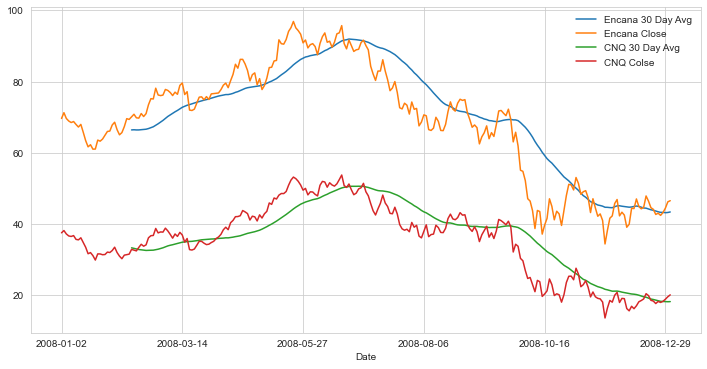

In [50]:
plt.figure(figsize=(12,6))
encana['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='Encana 30 Day Avg')
encana['Close'].loc['2008-01-01':'2009-01-01'].plot(label='Encana Close')
cnq['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='CNQ 30 Day Avg')
cnq['Close'].loc['2008-01-01':'2009-01-01'].plot(label='CNQ Colse')
#plt.legend()
plt.legend(loc ="upper right",framealpha=0)

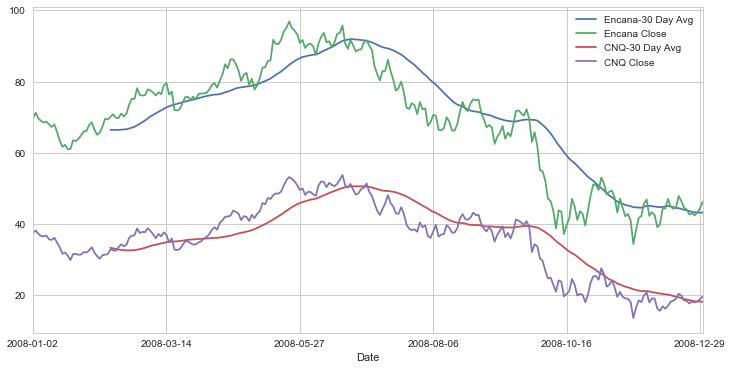

**A way to present correlation is to create a heatmap. Please create a heatmap of the correlation between the stocks close price.**

<AxesSubplot:xlabel='Entity', ylabel='Entity'>

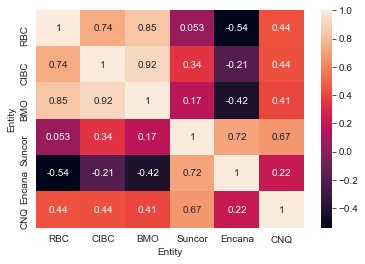

In [11]:
# Code here please
sns.heatmap(bo.xs(key='Close',axis=1,level='Stock').corr(),annot=True)


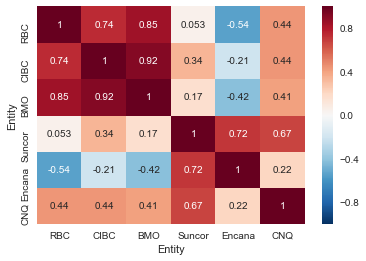

Notice Encana's correlation with the banks!<br><br>
**Plot the interactive heatmap**

In [16]:
# Code here please
close_corr = bo.xs(key='Close',axis=1,level='Stock').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

**Let's see the clustermap, how the correlations make clusters together for stock close price?**

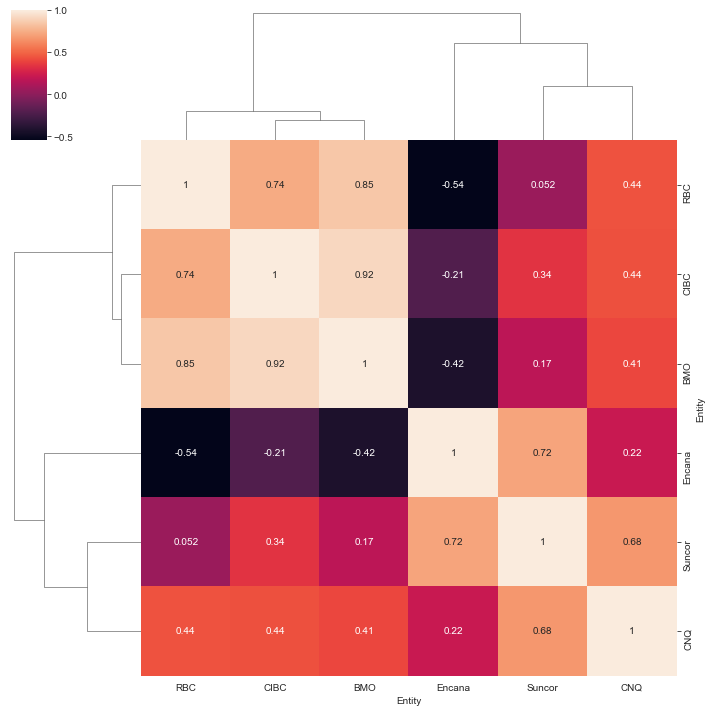

In [15]:
# Code here please
sns.clustermap(bo.xs(key='Open',axis=1,level='Stock').corr(),annot=True)

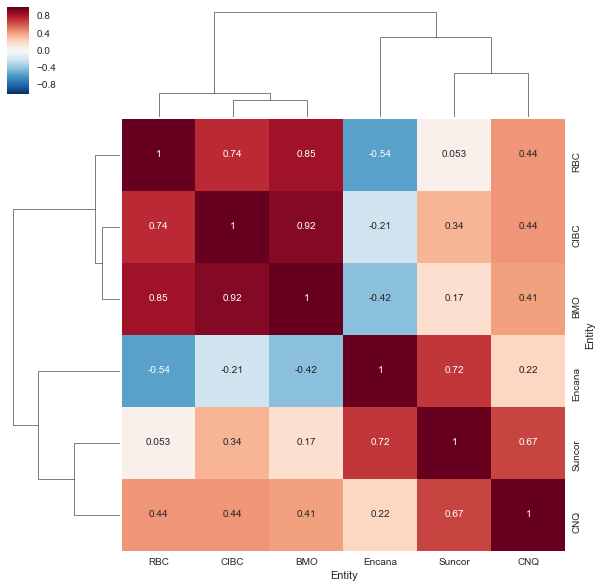

**Create a candle plot for Encana stock for 2008.**

[candle or candlestick plot](https://en.wikipedia.org/wiki/Candlestick_chart) is a style of financial chart which need a dataset that contains open, high, low and close values for each time period we want to display. 

In [18]:
# Code here please
encana[['Open','High','Low','Close']].loc['2008-01-01':'2009-01-01'].iplot(kind='candle',title='Candle plot for encana')

** Technical Analysis -- Use [`.ta_plot(study='sma')`](https://plot.ly/pandas/moving-average/) to create a Simple Moving Averages (SMA) plot of Encana for the year 2015. Pass in `periods=[10,30,50]`**

In [59]:
# Code here please
encana['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[10,30,50],title='Simple Moving Averages Encana')

There is another common type of data plotting,[Bollinger Band](https://en.wikipedia.org/wiki/Bollinger_Bands). Bollinger Bands are a type of statistical chart characterizing the prices and volatility over time of a financial instrument or commodity, using a formulaic method propounded by John Bollinger in the 1980s.<br>
**Create Bollinger Band Plot for Encana for the year 2015. Use `.ta_plot(study='boll')`**

In [60]:
# Code here please
encana['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll',title='Encana')

## Good Luck <br><br><br><br><br><br><br><br><br><br><br>

# Excellent Work!

Learning is fun!<br>
Lots of finance in the project, **No worries**, if you don't understand all because you are not suppose to learn finance in this course. <br> 
The project was specially designed with lot's of care to make you learn using real data. Yes, we can use lot's of other datasets but financial analysis is very hot field now a days. It's good to get some basics while doing datascience. <br>
At the moment, the only thing you should be concerned with understanding are the basic pandas and data visualization.<br>
I suggest you guys to create a simple report using the above plots and write a page on your findings. See how the banking sector responded in the recession and how did the plan for the future. You can ask several question to you data and find the answers such as Do you think the oil sector learned from the recession and their future planning was good. Remember, while data analysis, reporting and making suggestions, domain knowledge is very important, you must consider all the circumstance that played their part. <br>

So guys, with this project, we are done with the data analysis and data visualization section. The next one in Machine Learning. Let's move on and learn the most demanding skills in the market now a days. 
See you in the next section, 



In [ ]:
#df.loc[df['Value'].idxmax()]
# Best Single day gain
#returns.loc[returns['Encana Return'].idxmax()]
#returns.max()
#returns['Encana Return'].idxmax()

## About the Data!
### The code below is used to create the following datasets for this capstone project. 

* **RBC.csv** (RBC Royal Bank)
* **CIBC.csv** (CIBC Commercial bank)
* **BMO.csv** (BMO Bank of Montreal)
* **Suncor.csv** (Suncor energy)
* **Encana.csv** (Encana corp.)
* **USO.csv** (United State Oil fund) 
* **WTI.csv** (West Texas Intermediate (WTI), also known as Texas light sweet, is a grade of crude oil used as a benchmark in oil pricing.)

**How to get the stock data!**<br>
Although, the stock data is provided as separate ".csv" files for each of the company/bank. I suggest, follow the steps to directly download the data. If this does not workout for some reasons, you can always read the .csv files!<br>
* [Install pandas-datareader](https://github.com/pydata/pandas-datareader) - `pip install pandas-datareader`
* set `start` and `end` `datetime` objects, "`import datetime`"
* look for the `ticker symbols` for each company/bank, you can google them.
* use [datareader](https://pandas-datareader.readthedocs.io/en/latest/) to grab the stock information. info on the stock. Try google API.

For your convenience, the code is given below. 

`#import warnings`<br>
`#warnings.simplefilter("ignore")`<br>
`import pandas as pd`<br>
`import pandas_datareader.data as web`<br>
`import datetime`<br>

** Start and end date for stocks**<br>
`start = datetime.datetime(2007, 1, 1)`<br>
`end = datetime.datetime(2017, 1, 1)`


`rbc = web.DataReader('RY', 'google', start, end)` #** Royal Bank of Canada**<br>
`cibc = web.DataReader('CM', 'google', start, end)` #** Canadian Imperial Bank of Commerce**<br>
`bmo = web.DataReader('BMO', 'google', start, end)` #** Bank of Montreal **<br>
`suncor = web.DataReader('SU', 'google', start, end)` #** Suncor Energy Inc.**<br>
`encana = web.DataReader('ECA', 'google', start, end)` # ** Encana Corp.**<br>
`cnq = web.DataReader('CNQ', 'google', start, end)` # ** Canadian Natural Resource Ltd. **<br>
`cvx = web.DataReader('CVX', 'google', start, end)` # ** Chevron Corporation**<br>
`bac = web.DataReader('BAC', 'google', start, end)` # ** Bank of America**<br>
`uso = web.DataReader('USO', 'google', start, end)` # ** United States Oil Fund LP (ETF)**<br>
`wti = web.DataReader('EIA/PET_RWTC_D', 'quandl', start, end)` #** WTI Oil price **<br>

### If you want to save them as .csv files

`rbc.to_csv('RBC.csv')`<br>
`cibc.to_csv('CIBC.csv')`<br>
`bmo.to_csv('BMO.csv')`<br>
`suncor.to_csv('Suncor.csv')`<br>
`encana.to_csv('Encana.csv')`<br>
`cnq.to_csv('CNQ.csv')`<br>
`cvx.to_csv('CVX.csv')`<br>
`bac.to_csv('BAC.csv')`<br>
`uso.to_csv('USO.csv')`<br>
`wti.to_csv('WTI.csv')`












In [ ]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2017, 1, 1)

In [ ]:
wti = web.DataReader('EIA/PET_RWTC_D', 'quandl', start, end)
wti.head()

NameError: name 'web' is not defined

In [ ]:
c = web.google.daily.GoogleDailyReader()

c.url

In [ ]:
web.__version__

In [ ]:
#uso = web.DataReader('USO', 'google', start, end)